## Lecture, affichage et sauvgarded d'une image

In [187]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from print_color import print

### Affichage de l'image '*cameraman.tif*'


In [244]:
cameraman_tif = cv2.imread("assets/cameraman.tif")

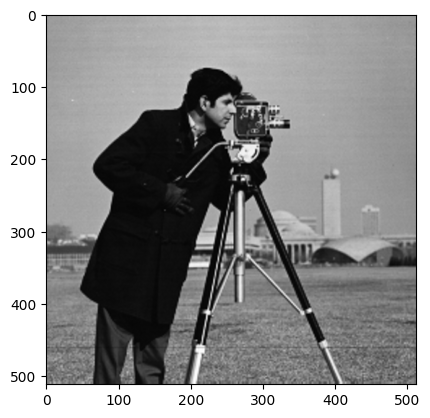

In [245]:
plt.imshow(cameraman_tif, cmap='gray')

### les caracteristiques de l'image

In [246]:
print("cameraman.tif properties :")
print(f"\twidth\t: {cameraman_tif.shape[0]}")
print(f"\theight\t: {cameraman_tif.shape[1]}")
print(f"\tchannel\t: {cameraman_tif.shape[2]}")

cameraman.tif properties :
	width	: 512
	height	: 512
	channel	: 3


> nous avons remarqué que même "cameraman.tif" est une image en niveaux de gris, le nombre de canaux de couleur est egale a trois, il y a en fait trois canaux de couleur mais avec des valeurs égales

In [247]:
print(cameraman_tif[0,0])

[156 156 156]


### Les option de la fonction "cv2.imshow()"
page de manuel

```Docstring:
imshow(winname, mat) -> None
.   @brief Displays an image in the specified window.
.   
.   The function imshow displays an image in the specified window. If the window was created with the
.   cv::WINDOW_AUTOSIZE flag, the image is shown with its original size, however it is still limited by the screen resolution.
.   Otherwise, the image is scaled to fit the window. The function may scale the image, depending on its depth:
.   
.   -   If the image is 8-bit unsigned, it is displayed as is.
.   -   If the image is 16-bit unsigned, the pixels are divided by 256. That is, the
.       value range [0,255\*256] is mapped to [0,255].
.   -   If the image is 32-bit or 64-bit floating-point, the pixel values are multiplied by 255. That is, the
.       value range [0,1] is mapped to [0,255].
.   -   32-bit integer images are not processed anymore due to ambiguouty of required transform.
.       Convert to 8-bit unsigned matrix using a custom preprocessing specific to image's context.
.   
.   If window was created with OpenGL support, cv::imshow also support ogl::Buffer , ogl::Texture2D and
.   cuda::GpuMat as input.
.   
.   If the window was not created before this function, it is assumed creating a window with cv::WINDOW_AUTOSIZE.
.   
.   If you need to show an image that is bigger than the screen resolution, you will need to call namedWindow("", WINDOW_NORMAL) before the imshow.
.   
.   @note This function should be followed by a call to cv::waitKey or cv::pollKey to perform GUI
.   housekeeping tasks that are necessary to actually show the given image and make the window respond
.   to mouse and keyboard events. Otherwise, it won't display the image and the window might lock up.
.   For example, **waitKey(0)** will display the window infinitely until any keypress (it is suitable
.   for image display). **waitKey(25)** will display a frame and wait approximately 25 ms for a key
.   press (suitable for displaying a video frame-by-frame). To remove the window, use cv::destroyWindow.
.   
.   @note [__Windows Backend Only__] Pressing Ctrl+C will copy the image to the clipboard. Pressing Ctrl+S will show a dialog to save the image.
.   
.   @param winname Name of the window.
.   @param mat Image to be shown.
Type:      builtin_function_or_method```

### Affichage de l'image '*autumn.tif*'

In [248]:
autumn_tif = cv2.imread("assets/autumn.tif")

In [249]:
autumn_rgb = cv2.cvtColor(autumn_tif, cv2.COLOR_BGR2RGB)

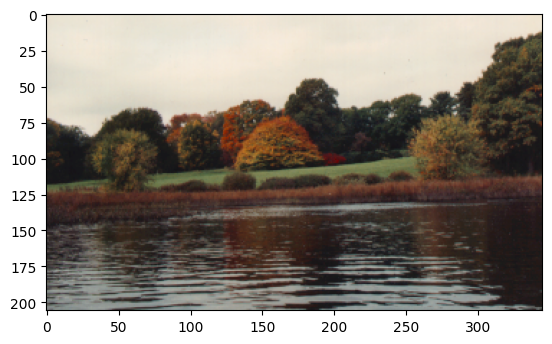

In [250]:
# plt.imshow(autumn_tif)
plt.imshow(autumn_rgb)

> comme cela a été remarqué, cv2 lit l'image au format couleur BGR, ce qui peut affecter l'apparence de l'image et non les valeurs des pixels, pour cela, nous devons convertir les xhnnels de couleur de BGR en RGV en utilisant :
>
>```python v2.cvtColor(autumn_tif, cv2.COLOR_BGR2RGB)```

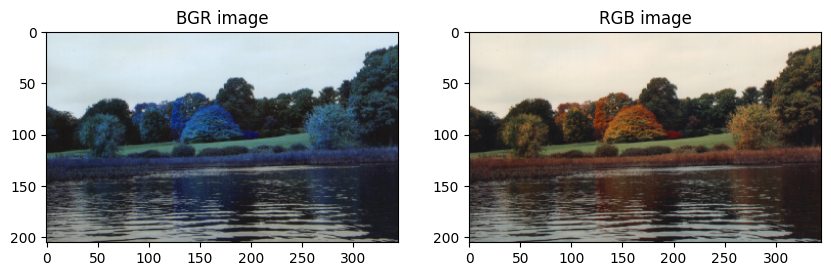

In [260]:
plt.figure(figsize=(10, 6))

plt.subplot(1,2,1)
plt.imshow(autumn_tif)
plt.title("BGR image")

plt.subplot(1,2,2)
plt.imshow(autumn_rgb)
plt.title("RGB image")

plt.show()

In [194]:
format = ["jpeg", "bmp", "png", "gif", "tiff"]
input = "./assets/cameraman."
for i in format :
    file_name = input + i
    try :
        cv2.imwrite(file_name, cameraman_tif)
        print(file_name, tag='success', tag_color='green', color='black')
    except :
        print(file_name, tag='failure', tag_color='red', color='magenta')
        

[success] ./assets/cameraman.jpeg
[success] ./assets/cameraman.bmp
[success] ./assets/cameraman.png
[failure] ./assets/cameraman.gif
[success] ./assets/cameraman.tiff


In [195]:
from PIL import Image

In [196]:
cameraman_gif = Image.fromarray(cameraman_tif)
cameraman_gif.save('./assets/cameraman.gif', format='GIF', duration=0)

In [197]:
def mse(image1, image2) :
    if image1.shape != image2.shape :
        raise Exception
    mse = np.mean((image1 - image2)**2)
    return mse

In [198]:
cameraman_jpeg = cv2.imread("./assets/cameraman.jpeg")
cameraman_bmp = cv2.imread("./assets/cameraman.bmp")
cameraman_png = cv2.imread("./assets/cameraman.png")
cameraman_gif = cv2.imread("./assets/cameraman.gif")
cameraman_tiff = cv2.imread("./assets/cameraman.tiff")

In [199]:
mse_cameraman_jpeg = mse(cameraman_tif, cameraman_jpeg)
print(mse_cameraman_jpeg)

0.78070068359375


In [200]:
mse_cameraman_bmp = mse(cameraman_tif, cameraman_bmp)
print(mse_cameraman_bmp)

0.0


In [201]:
mse_cameraman_png = mse(cameraman_tif, cameraman_png)
print(mse_cameraman_png)

0.0


In [202]:
mse_cameraman_tiff = mse(cameraman_tif, cameraman_tiff)
print(mse_cameraman_tiff)

0.0


In [203]:
compression_quality = 0
input = "./assets/cameraman_jpeg_cmp_"
while compression_quality <= 100 :
    file_name = input + str(compression_quality) + ".jpeg"
    try :
        cv2.imwrite(file_name, cameraman_tif, [int(cv2.IMWRITE_JPEG_QUALITY), compression_quality])
        print(f"compression quality {compression_quality}", tag='success', tag_color='green', color='black')
    except :
        print(f"compression quality {compression_quality}", tag='failure', tag_color='red', color='magenta')
    compression_quality += 25

[success] compression quality 0
[success] compression quality 25
[success] compression quality 50
[success] compression quality 75
[success] compression quality 100


In [204]:
cameraman_jpeg_cmp_0 = cv2.imread("./assets/cameraman_jpeg_cmp_0.jpeg")
cameraman_jpeg_cmp_25 = cv2.imread("./assets/cameraman_jpeg_cmp_25.jpeg")
cameraman_jpeg_cmp_50 = cv2.imread("./assets/cameraman_jpeg_cmp_50.jpeg")
cameraman_jpeg_cmp_75 = cv2.imread("./assets/cameraman_jpeg_cmp_75.jpeg")
cameraman_jpeg_cmp_100 = cv2.imread("./assets/cameraman_jpeg_cmp_100.jpeg")

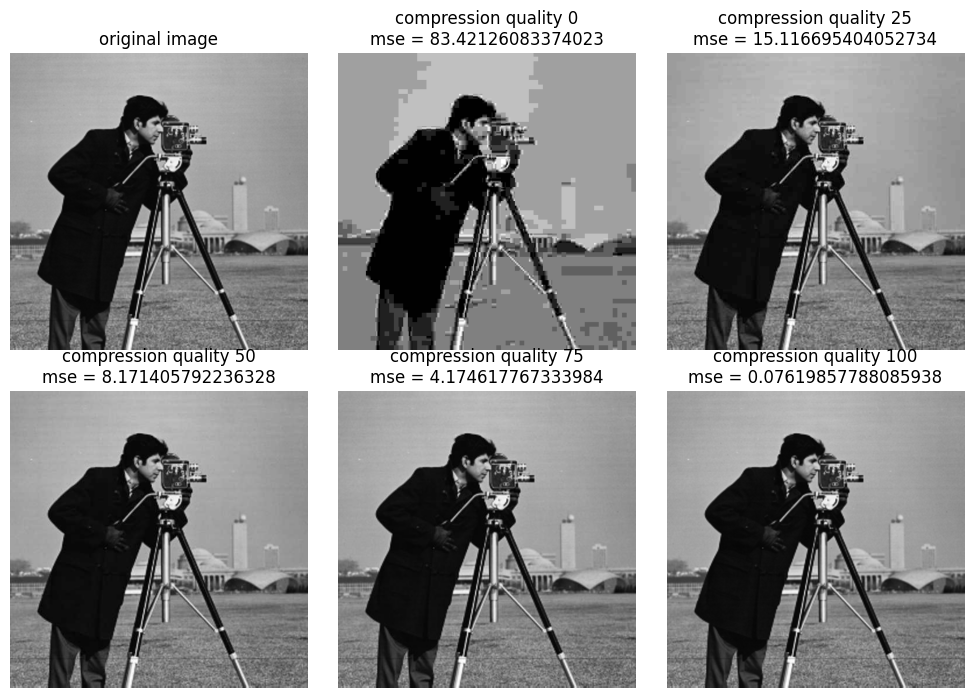

In [205]:
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

axes[0, 0].imshow(cameraman_tif)
axes[0, 0].set_title('original image')

axes[0, 1].imshow(cameraman_jpeg_cmp_0)
axes[0, 1].set_title('compression quality 0\nmse = ' + str(mse(cameraman_tif, cameraman_jpeg_cmp_0)))

axes[0, 2].imshow(cameraman_jpeg_cmp_25)
axes[0, 2].set_title('compression quality 25\nmse = ' + str(mse(cameraman_tif, cameraman_jpeg_cmp_25)))

axes[1, 0].imshow(cameraman_jpeg_cmp_50)
axes[1, 0].set_title('compression quality 50\nmse = ' + str(mse(cameraman_tif, cameraman_jpeg_cmp_50)))

axes[1, 1].imshow(cameraman_jpeg_cmp_75)
axes[1, 1].set_title('compression quality 75\nmse = ' + str(mse(cameraman_tif, cameraman_jpeg_cmp_75)))

axes[1, 2].imshow(cameraman_jpeg_cmp_100)
axes[1, 2].set_title('compression quality 100\nmse = ' + str(mse(cameraman_tif, cameraman_jpeg_cmp_100)))

for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()

plt.show()

In [206]:
gray_autumn_tif = cv2.cvtColor(autumn_tif, cv2.COLOR_BGR2GRAY)

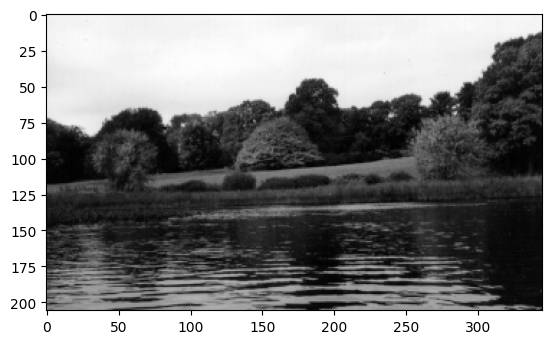

In [207]:
plt.imshow(gray_autumn_tif, cmap='gray')

In [208]:
blue_autumn_tif, green_autumn_tif, red_autumn_tif = cv2.split(autumn_tif)

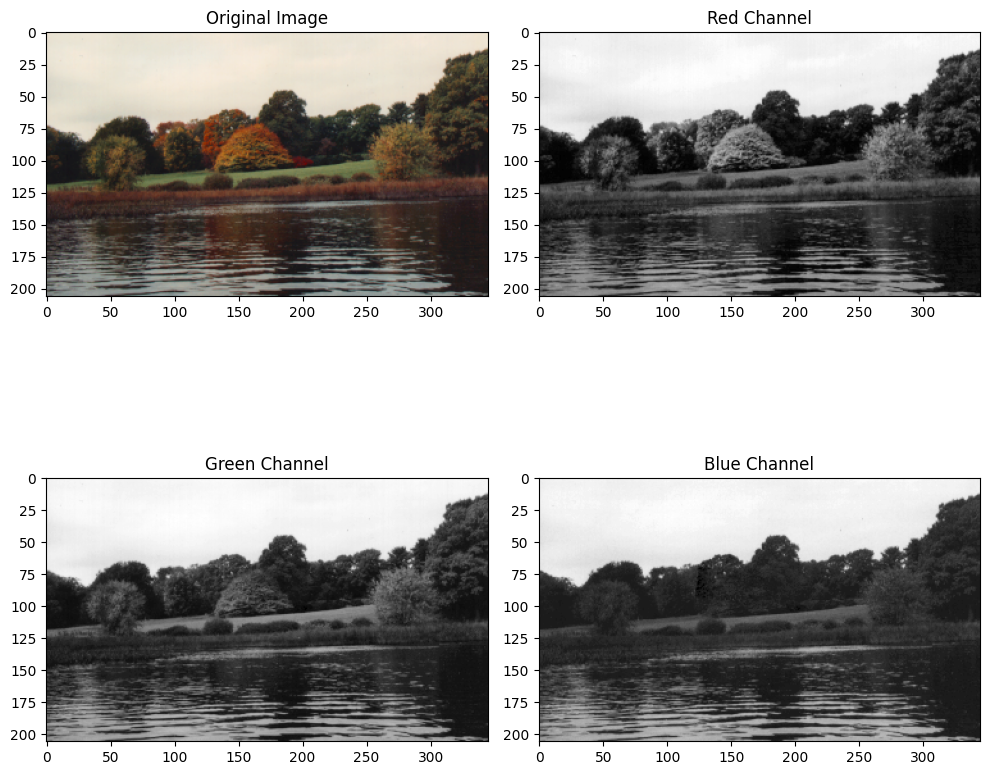

In [209]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(cv2.cvtColor(autumn_tif, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(red_autumn_tif, cmap='gray')
axs[0, 1].set_title('Red Channel')

axs[1, 0].imshow(green_autumn_tif, cmap='gray')
axs[1, 0].set_title('Green Channel')

# Display the B channel
axs[1, 1].imshow(blue_autumn_tif, cmap='gray')
axs[1, 1].set_title('Blue Channel')

plt.tight_layout()
plt.show()


In [210]:
lena_color_tif = cv2.imread("./assets/lena_color_256.tif")

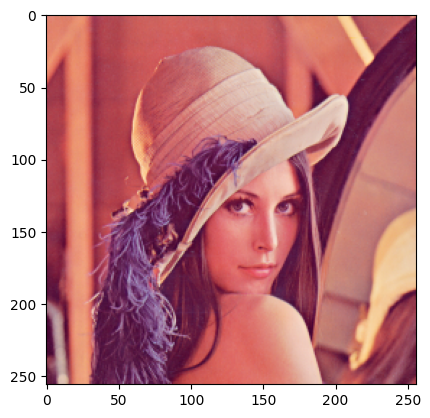

In [211]:
lena_color_rgb = cv2.cvtColor(lena_color_tif, cv2.COLOR_BGR2RGB)
plt.imshow(lena_color_rgb)

In [212]:
print("nbr_pixet =", lena_color_tif.size)

nbr_pixet = 196608


In [213]:
print(lena_color_rgb)

[[[226 137 125]
  [223 136 130]
  [226 133 118]
  ...
  [230 145 127]
  [232 148 122]
  [210 114 100]]

 [[226 137 125]
  [223 136 130]
  [226 133 118]
  ...
  [230 145 127]
  [232 148 122]
  [210 114 100]]

 [[226 138 124]
  [223 133 121]
  [226 134 117]
  ...
  [222 133 118]
  [217 125 108]
  [182  87  90]]

 ...

 [[ 90  28  61]
  [ 91  28  61]
  [ 97  29  63]
  ...
  [140  53  71]
  [158  62  73]
  [161  59  74]]

 [[ 85  20  60]
  [ 91  25  59]
  [ 94  26  62]
  ...
  [153  64  82]
  [172  69  81]
  [170  65  78]]

 [[ 82  22  57]
  [ 94  30  62]
  [ 95  25  61]
  ...
  [167  71  84]
  [178  68  78]
  [183  72  81]]]


In [214]:
lena_color_hsv = cv2.cvtColor(lena_color_rgb, cv2.COLOR_RGB2HSV)
cv2.imwrite("./assets/lena_color_hsv.tif", lena_color_hsv)

True

In [215]:
# fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# axs[0].imshow(lena_color_rgb)
# axs[0].set_title('RGB image')

# axs[1].imshow(lena_color_hsv)
# axs[1].set_title('HSV image')

# plt.tight_layout()
# plt.show()

In [216]:
lena_gray = cv2.cvtColor(lena_color_rgb, cv2.COLOR_RGB2GRAY)
cv2.imwrite("./assets/lena_gray.tif", lena_gray)

True

In [217]:
# fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# axs[0].imshow(lena_color_rgb)
# axs[0].set_title('RGB image')

# axs[1].imshow(lena_gray, cmap='gray')
# axs[1].set_title('Gray image')

# plt.tight_layout()
# plt.show()

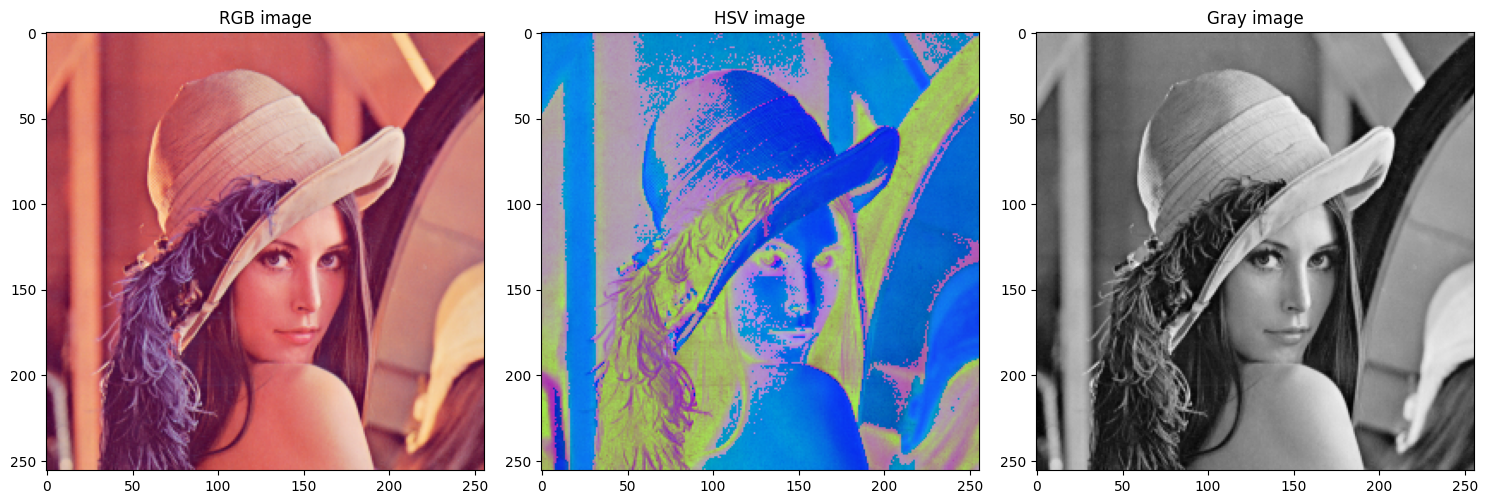

In [218]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(lena_color_rgb)
axs[0].set_title('RGB image')

axs[1].imshow(lena_color_hsv)
axs[1].set_title('HSV image')

axs[2].imshow(lena_gray, cmap='gray')
axs[2].set_title('Gray image')

plt.tight_layout()
plt.show()

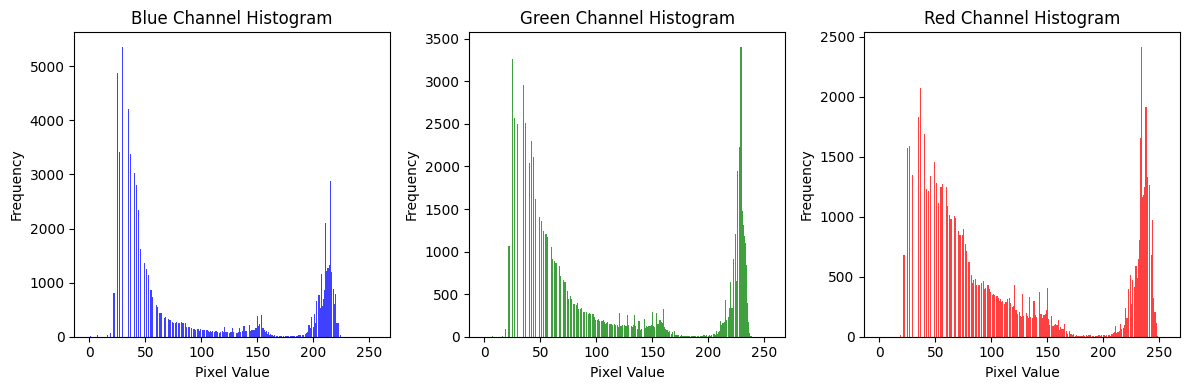

In [219]:
hist_blue = cv2.calcHist([autumn_tif], [0], None, [256], [0, 256])
hist_green = cv2.calcHist([autumn_tif], [1], None, [256], [0, 256])
hist_red = cv2.calcHist([autumn_tif], [2], None, [256], [0, 256])

plt.figure(figsize=(12, 4))

plt.subplot(131)
# plt.plot(hist_blue, color='blue')
plt.bar(np.arange(256), hist_blue.flatten(), width=1, alpha=0.75, color='blue')
plt.title('Blue Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(132)
#plt.plot(hist_green, color='green')
plt.bar(np.arange(256), hist_green.flatten(), width=1, alpha=0.75, color='green')
plt.title('Green Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(133)
# plt.plot(hist_red, color='red')
plt.bar(np.arange(256), hist_red.flatten(), width=1, alpha=0.75, color='red')
plt.title('Red Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [220]:
lut = {}
min = np.min(cameraman_tif)
max = np.max(cameraman_tif)
for i in range(min, max + 1) :
    if i not in lut :
        lut[i] = 255 * (i - min) // (max - min)

In [221]:
height, width, channels = cameraman_tif.shape

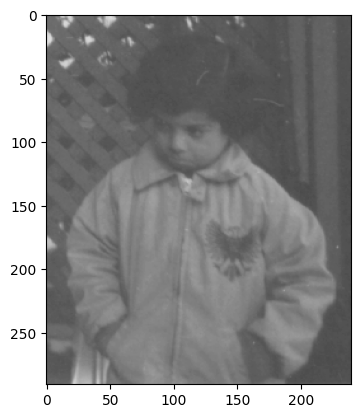

In [222]:
pout_tif = cv2.imread("./assets/pout.tif")
plt.imshow(pout_tif, cmap='gray')

In [223]:
height, width, channels = pout_tif.shape
enhanced_pout_tif = pout_tif
for i in range(height):
    for j in range(width):
        for k in range(channels) :
            enhanced_pout_tif = lut[pout_tif[i, j, k]]
        

In [224]:
# fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# axs[0].imshow(pout_tif)
# axs[0].set_title('Original image')

# axs[1].imshow(enhanced_pout_tif)
# axs[1].set_title('Enhanced image')

# plt.tight_layout()
# plt.show()

In [225]:
cameraman_tif = cv2.imread("./assets/cameraman.tif", cv2.IMREAD_GRAYSCALE)
hist_cameraman = cv2.calcHist([cameraman_tif], [0], None, [256], [0, 256])
cameraman_ecart_type = np.std(cameraman_tif)

In [226]:
equalized_cameraman = cv2.equalizeHist(cameraman_tif)
hist_equalized_cameraman = cv2.calcHist([equalized_cameraman], [0], None, [256], [0, 256])
equalized_cameraman_ecart_type = np.std(equalized_cameraman)

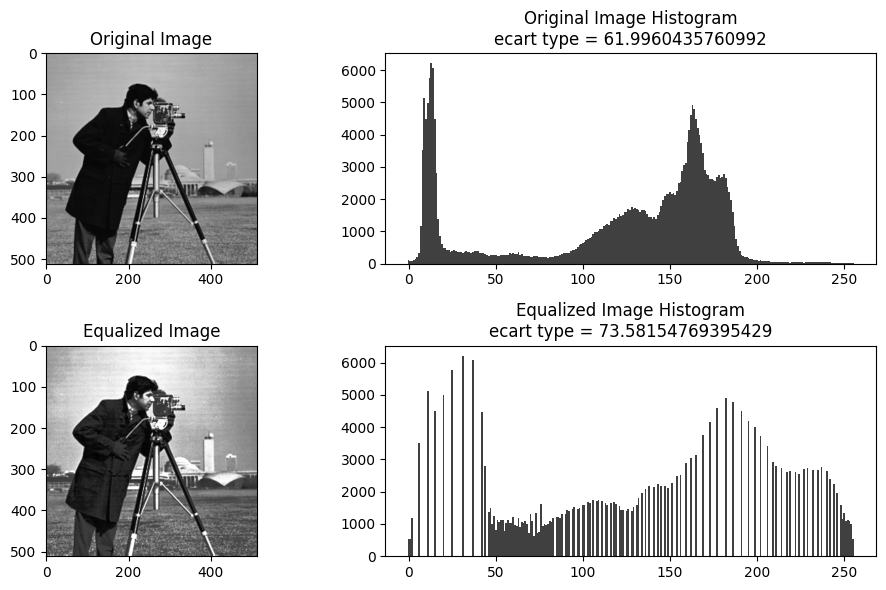

In [237]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(cameraman_tif, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 3)
plt.imshow(equalized_cameraman, cmap='gray')
plt.title('Equalized Image')

# Display histograms
plt.subplot(2, 2, 2)
# plt.plot(hist_cameraman, color='black')
plt.bar(np.arange(256), hist_cameraman.flatten(), width=1, alpha=0.75, color='black')
plt.title('Original Image Histogram\necart type = ' + str(cameraman_ecart_type))

plt.subplot(2, 2, 4)
# plt.plot(hist_equalized_cameraman, color='black')
plt.bar(np.arange(256), hist_equalized_cameraman.flatten(), width=1, alpha=0.75, color='black')
plt.title('Equalized Image Histogram\necart type = ' + str(equalized_cameraman_ecart_type))

plt.tight_layout()
plt.show()

In [66]:
pout_tif = cv2.imread("./assets/pout.tif", cv2.IMREAD_GRAYSCALE)
hist_pout = cv2.calcHist([pout_tif], [0], None, [256], [0, 256])
pout_ecart_type = np.std(pout_tif)

In [67]:
equalized_pout = cv2.equalizeHist(pout_tif)
hist_equalized_pout = cv2.calcHist([equalized_pout], [0], None, [256], [0, 256])
equalized_pout_ecart_type = np.std(equalized_pout)

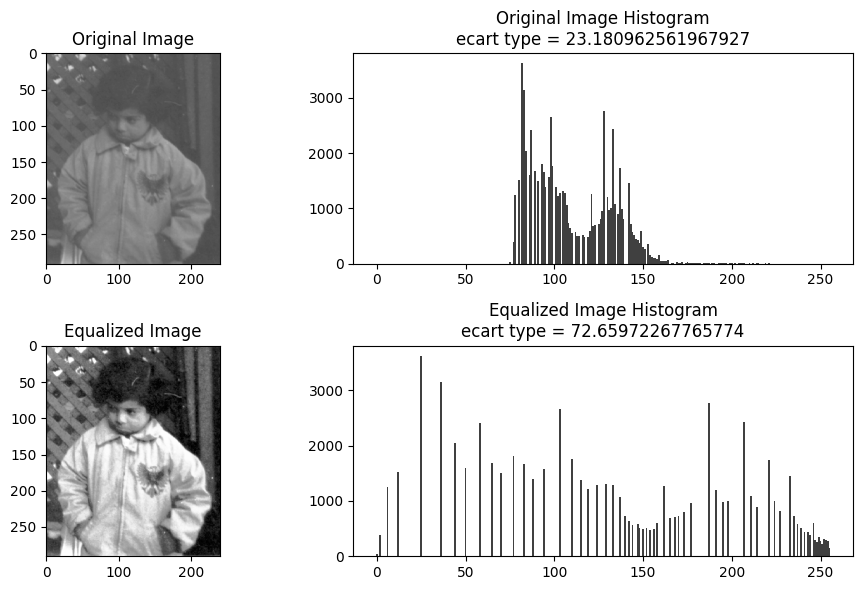

In [239]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(pout_tif, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 3)
plt.imshow(equalized_pout, cmap='gray')
plt.title('Equalized Image')

# Display histograms
plt.subplot(2, 2, 2)
# plt.plot(hist_pout, color='black')
plt.bar(np.arange(256), hist_pout.flatten(), width=1, alpha=0.75, color='black')
plt.title('Original Image Histogram\necart type = ' + str(pout_ecart_type))

plt.subplot(2, 2, 4)
# plt.plot(hist_equalized_pout, color='black')
plt.bar(np.arange(256), hist_equalized_pout.flatten(), width=1, alpha=0.75, color='black')
plt.title('Equalized Image Histogram\necart type = ' + str(equalized_pout_ecart_type))

plt.tight_layout()
plt.show()

In [77]:
shape = cameraman_tif.shape

In [139]:
gauss_noise = np.zeros(shape, dtype = np.uint8)
cv2.randn(gauss_noise, 128, 20)
gauss_noise = (gauss_noise * 0.5).astype(np.uint8)


In [140]:
salt_peper_noise = np.zeros(shape, dtype = np.uint8)
cv2.randu(salt_peper_noise, 0, 255)
salt_peper_noise = cv2.threshold(salt_peper_noise, 245, 255, cv2.THRESH_BINARY)[1]


In [141]:
cameraman_gauss_noise = cv2.add(cameraman_tif, gauss_noise)
cameraman_sault_peper = cv2.add(cameraman_tif, salt_peper_noise)

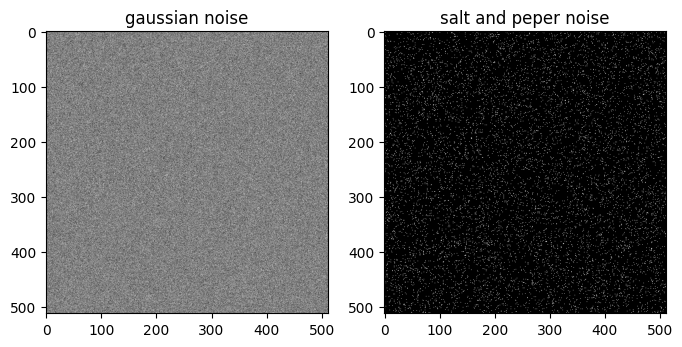

In [142]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(gauss_noise, cmap='gray')
plt.title("gaussian noise")

plt.subplot(1, 2, 2)
plt.imshow(salt_peper_noise, cmap='gray')
plt.title("salt and peper noise")

plt.show()

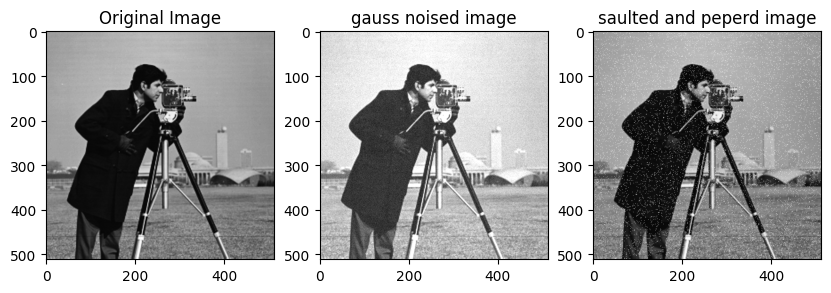

In [148]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(cameraman_tif, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cameraman_gauss_noise, cmap='gray')
plt.title('gauss noised image')

plt.subplot(1, 3, 3)
plt.imshow(cameraman_sault_peper, cmap='gray')
plt.title('saulted and peperd image')
plt.show()

In [160]:
cameraman_filtered_gaussian = cv2.GaussianBlur(cameraman_sault_peper, (3, 3), 0)
cameraman_filtered_median = cv2.medianBlur(cameraman_sault_peper, 3)
cameraman_mean_filtered = cv2.blur(cameraman_sault_peper, (3, 3)) 

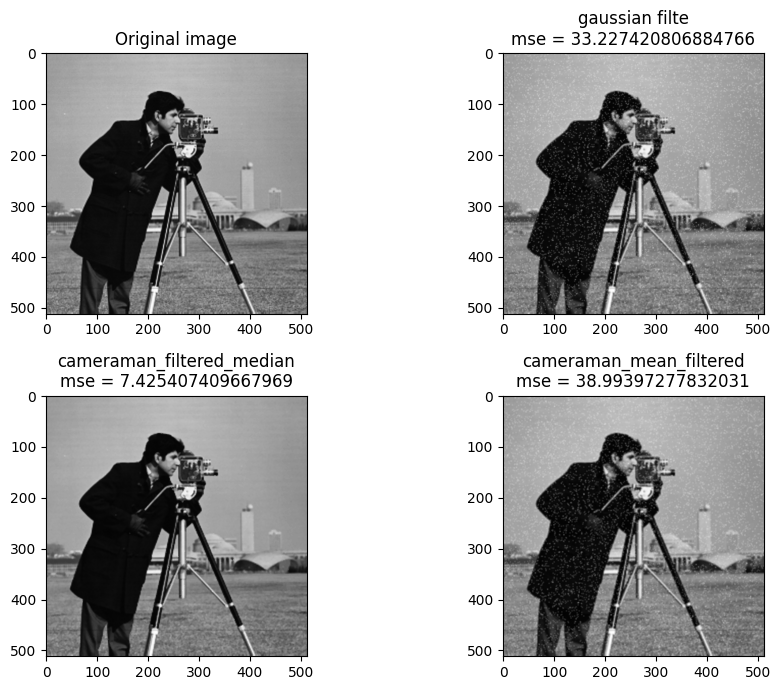

In [161]:
plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
plt.imshow(cameraman_tif, cmap='gray')
plt.title('Original image')

plt.subplot(2, 2, 2)
plt.imshow(cameraman_filtered_gaussian, cmap='gray')
plt.title('gaussian filte\nmse = '+ str(mse(cameraman_tif, cameraman_filtered_gaussian)))
plt.subplot(2, 2, 3)
plt.imshow(cameraman_filtered_median, cmap='gray')
plt.title('cameraman_filtered_median\nmse = '+ str(mse(cameraman_tif, cameraman_filtered_median)))
plt.subplot(2, 2, 4)
plt.imshow(cameraman_mean_filtered, cmap='gray')
plt.title('cameraman_mean_filtered\nmse = '+ str(mse(cameraman_tif, cameraman_mean_filtered)))

plt.tight_layout()
plt.show()

In [170]:
cameraman_filtered_gaussian = cv2.GaussianBlur(cameraman_sault_peper, (7, 7), 0)
cameraman_filtered_median = cv2.medianBlur(cameraman_sault_peper, 7)
cameraman_mean_filtered = cv2.blur(cameraman_sault_peper, (7, 7)) 

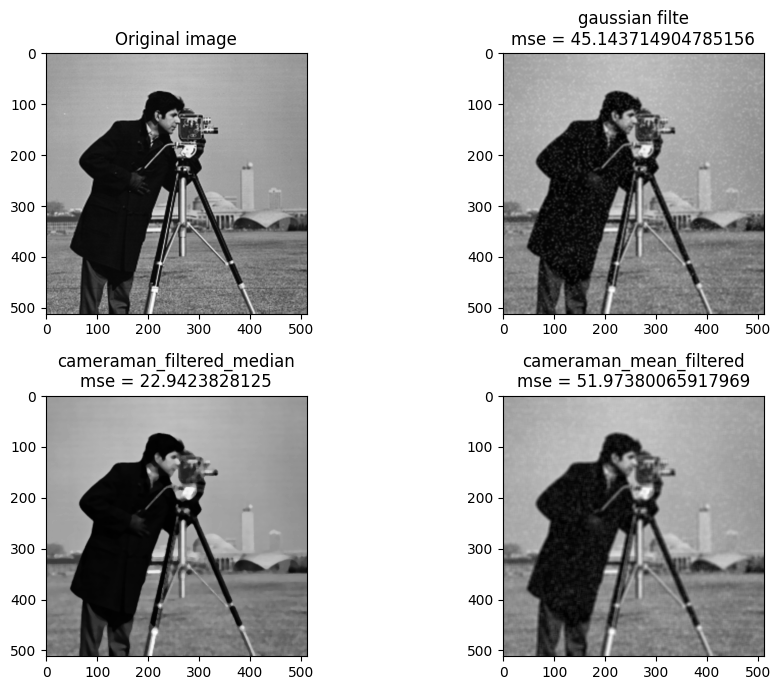

In [171]:
plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
plt.imshow(cameraman_tif, cmap='gray')
plt.title('Original image')

plt.subplot(2, 2, 2)
plt.imshow(cameraman_filtered_gaussian, cmap='gray')
plt.title('gaussian filte\nmse = '+ str(mse(cameraman_tif, cameraman_filtered_gaussian)))
plt.subplot(2, 2, 3)
plt.imshow(cameraman_filtered_median, cmap='gray')
plt.title('cameraman_filtered_median\nmse = '+ str(mse(cameraman_tif, cameraman_filtered_median)))
plt.subplot(2, 2, 4)
plt.imshow(cameraman_mean_filtered, cmap='gray')
plt.title('cameraman_mean_filtered\nmse = '+ str(mse(cameraman_tif, cameraman_mean_filtered)))

plt.tight_layout()
plt.show()

In [178]:
cameraman_filtered_gaussian = cv2.GaussianBlur(cameraman_filtered_gaussian, (3, 3), 0)
cameraman_filtered_median = cv2.medianBlur(cameraman_filtered_gaussian, 3)
cameraman_mean_filtered = cv2.blur(cameraman_filtered_gaussian, (3, 3)) 

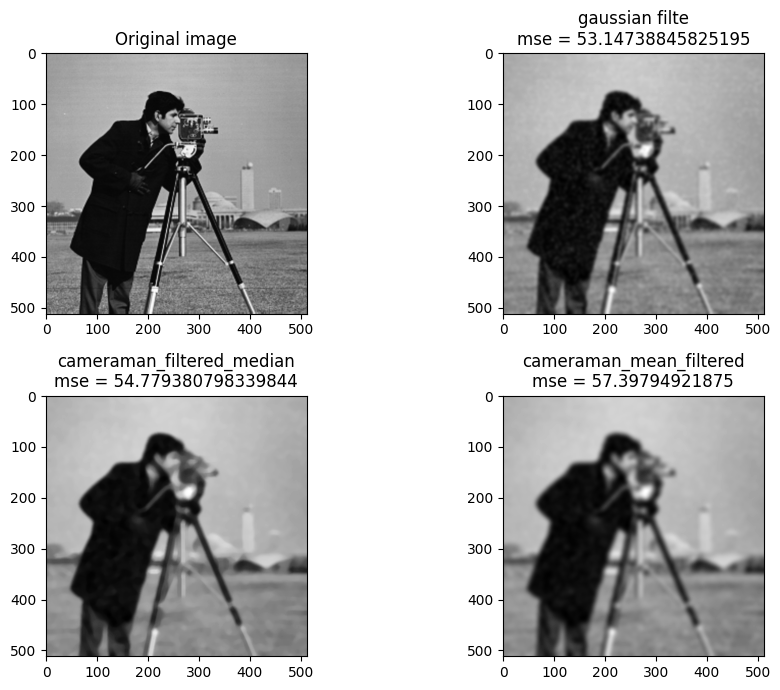

In [177]:
plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
plt.imshow(cameraman_tif, cmap='gray')
plt.title('Original image')

plt.subplot(2, 2, 2)
plt.imshow(cameraman_filtered_gaussian, cmap='gray')
plt.title('gaussian filte\nmse = '+ str(mse(cameraman_tif, cameraman_filtered_gaussian)))
plt.subplot(2, 2, 3)
plt.imshow(cameraman_filtered_median, cmap='gray')
plt.title('cameraman_filtered_median\nmse = '+ str(mse(cameraman_tif, cameraman_filtered_median)))
plt.subplot(2, 2, 4)
plt.imshow(cameraman_mean_filtered, cmap='gray')
plt.title('cameraman_mean_filtered\nmse = '+ str(mse(cameraman_tif, cameraman_mean_filtered)))

plt.tight_layout()
plt.show()